In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import scipy.stats as sts
from scipy.stats import linregress

%matplotlib inline

In [95]:
# Data Directory
data_loc = "Resources"

# Output Directory
output_data_loc = "Output"

# Data File (CSV)
data_file_path = f"{data_loc}/spotify_dataset.csv"

# Read into DataFrame
data_df = pd.read_csv(data_file_path)

data_df.count()

Index                        1556
Highest Charting Position    1556
Number of Times Charted      1556
Week of Highest Charting     1556
Song Name                    1556
Streams                      1556
Artist                       1556
Artist Followers             1556
Song ID                      1556
Genre                        1556
Release Date                 1556
Weeks Charted                1556
Popularity                   1556
Danceability                 1556
Energy                       1556
Loudness                     1556
Speechiness                  1556
Acousticness                 1556
Liveness                     1556
Tempo                        1556
Duration (ms)                1556
Valence                      1556
Chord                        1556
dtype: int64

In [96]:
# Update any blank cells to be nan so the rows can be dropped - we only want records with all the metrics intact
data_df.replace("", np.nan, inplace=True)
data_df.replace(" ", np.nan, inplace=True)

# Delete any records with null values
data_df = data_df.dropna()

data_df.count()



Index                        1545
Highest Charting Position    1545
Number of Times Charted      1545
Week of Highest Charting     1545
Song Name                    1545
Streams                      1545
Artist                       1545
Artist Followers             1545
Song ID                      1545
Genre                        1545
Release Date                 1545
Weeks Charted                1545
Popularity                   1545
Danceability                 1545
Energy                       1545
Loudness                     1545
Speechiness                  1545
Acousticness                 1545
Liveness                     1545
Tempo                        1545
Duration (ms)                1545
Valence                      1545
Chord                        1545
dtype: int64

In [97]:
#data_df.loc[data_df['Song Name'] == 'NOT SOBER (feat. Polo G & Stunna Gambino)']

# Render
data_df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [30]:
data_df.shape

(1545, 23)

In [98]:
# Separate out genres so there is one per record

# copy the data into a new set to manipulate for genre
genre_df = data_df.copy()

# Convert from object to string
genre_df['Genre']=genre_df['Genre'].astype(str)

# Find records that have no Genres and set them to 0
genre_df.loc[genre_df["Genre"] == "[]", "Genre"] = np.nan
genre_df["Genre"] = genre_df["Genre"].fillna(0)

# Remove unneccessary characters
genre_df["Genre"] = genre_df["Genre"].str.replace("[", "", regex=True)
genre_df["Genre"] = genre_df["Genre"].str.replace("]", "", regex=True)
genre_df["Genre"] = genre_df["Genre"].str.replace("'", "", regex=True)

# Split on commas
genre_df["Genre"] = genre_df["Genre"].str.split(",")

# separte and create rows based on genres. There will now be a row for each 
# genre a given song has so we can easily create charts based on genre
genre_df = genre_df.explode('Genre')

# Render
genre_df.head()
#genre_df.columns

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,indie rock italiano,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,italian pop,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,pop,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B


In [56]:
genre_df

array([<AxesSubplot:>], dtype=object)

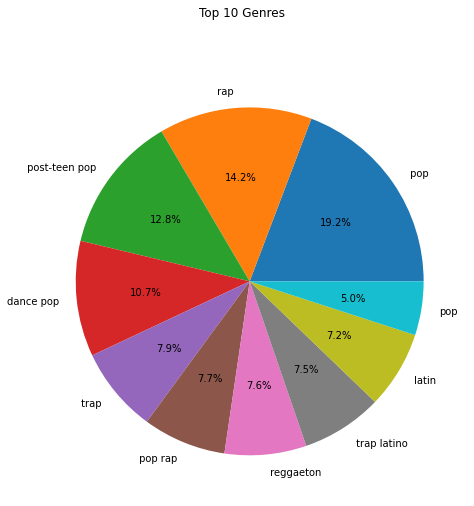

In [99]:
# Genereate pie chart for top 10 most popular genres
genre_df['Genre'].value_counts()[:10].plot.pie(subplots=True, 
                                               ylabel="", 
                                               title="Top 10 Genres", 
                                               autopct='%1.1f%%', 
                                               figsize=(8,8))


In [60]:
# Check the types - what do we need to convert for processing?
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1545 non-null   int64 
 1   Highest Charting Position  1545 non-null   int64 
 2   Number of Times Charted    1545 non-null   int64 
 3   Week of Highest Charting   1545 non-null   object
 4   Song Name                  1545 non-null   object
 5   Streams                    1545 non-null   object
 6   Artist                     1545 non-null   object
 7   Artist Followers           1545 non-null   object
 8   Song ID                    1545 non-null   object
 9   Genre                      1545 non-null   object
 10  Release Date               1545 non-null   object
 11  Weeks Charted              1545 non-null   object
 12  Popularity                 1545 non-null   object
 13  Danceability               1545 non-null   object
 14  Energy  

In [91]:
#Popularity
popularity_df = data_df.copy()
popularity_df['Popularity']=popularity_df['Popularity'].astype(int)


In [92]:
# Remove all songs with 0 popularity
idxs = popularity_df[popularity_df['Popularity']==0].index
popularity_df.drop(idxs, inplace=True)
popularity_df.loc[popularity_df['Popularity']==0]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord


In [230]:

# function to calculate linear regression values and return them along with the line equation after printing the r value
def calcLinregress(x_vals, y_vals):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    regress_values = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, rvalue

# function to genereate scatter plot showing linear regression, and save to file
def generateScatterPlot(x_vals, y_vals, regress_values, x_annotate, y_annotate, title, xlabel, ylabel, file_path=""):
    plt.scatter(x_vals, y_vals, edgecolors='k')
    plt.grid(True)
    plt.plot(x_vals,regress_values,"r-")    
    plt.annotate(ln_eq,(x_annotate,y_annotate),fontsize=15,color="red")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel) 
    if file_path != "": plt.savefig(file_path)
        
# function to generate basic dashboard
def genereateDashboard(x_vals, y_vals, xlabel, ylabel, regress_values, line_eq, x_annotate, y_annotate, file_path="") :
    
    # plots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    axs[0].grid(True)
    axs[0].plot(x_vals,regress_values,"r-")    
    axs[0].annotate(line_eq,(x_annotate,y_annotate),fontsize=15,color="red")
    axs[0].scatter(x_vals,y_vals, edgecolors='k')    
    axs[1].hist(x_vals)    
    axs[2].boxplot(y_vals)
    
    # labels
    fig.suptitle(f'{xlabel} vs. {ylabel}')
    axs[0].set_xlabel(xlabel)
    axs[1].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)
    axs[1].set_ylabel("Count")
    axs[2].set_ylabel(ylabel)
    
    plt.show()
    
    # Save to png file
    if file_path != "": plt.savefig(file_path)
        
# function to print out stats for figures
def generateStatsReport(r_val, x_src, y_src, x_label, y_label) :
    
    print("")
    print(f"The r-value is: {round(r_val,2)}")
    
    print("")
    print("---------------------------------------------------------------------")
    print("")

    mean_numpy = np.mean(x_src)
    print(f"The mean {x_label} is {round(mean_numpy,2)}")

    median_numpy = np.median(x_src)
    print(f"The median {x_label} is {round(median_numpy,2)}")

    mode_scipy = sts.mode(x_src)
    print(f"The mode {x_label} is {mode_scipy}")

    print("")

    print(f"Disribution results for 50 samples for {x_label}: {sts.normaltest(x_src.sample(50))}")

    print("")
    print("---------------------------------------------------------------------")
    print("")

    # Demonstrate calculating the variance and standard deviation using the different modules
    var_numpy = np.var(x_src,ddof = 0)
    print(f"The {x_label} variance is approx. {round(var_numpy,2)}")

    sd_numpy = np.std(x_src,ddof = 0)
    print(f"The {x_label} standard deviation is approx. {round(sd_numpy,2)}")

    # Calculate the 68-95-99.7 rule using the standard deviation
    print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,2)} and {round(mean_numpy+sd_numpy,2)}")
    print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,2)} and {round(mean_numpy+2*sd_numpy,2)}")
    print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,2)} and {round(mean_numpy+3*sd_numpy,2)}")

    print("")
    print("---------------------------------------------------------------------")
    print("")

    quartiles = y_src.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {y_label} is: {lowerq}")
    print(f"The upper quartile of {y_label} is: {upperq}")
    print(f"The interquartile range of {y_label} is: {iqr}")
    print(f"The the median of {y_label} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

In [223]:

# Update the dataframe data types and round for better plotting
popularity_df['Danceability']=popularity_df['Danceability'].astype(float).round(2)
popularity_df['Energy']=popularity_df['Energy'].astype(float).round(2)
popularity_df['Tempo']=popularity_df['Tempo'].astype(float).round(0)
popularity_df['Valence']=popularity_df['Valence'].astype(float).round(2)
popularity_df['Duration (ms)']=popularity_df['Duration (ms)'].astype(int)
popularity_df['Loudness']=popularity_df['Loudness'].astype(float).round(2)

# Pull out specific field data for processing
popularity = popularity_df["Popularity"]
danceability = popularity_df["Danceability"]
energy = popularity_df["Energy"]
tempo = popularity_df["Tempo"]
valence = popularity_df["Valence"]
duration = popularity_df["Duration (ms)"]
loudness = popularity_df["Loudness"]


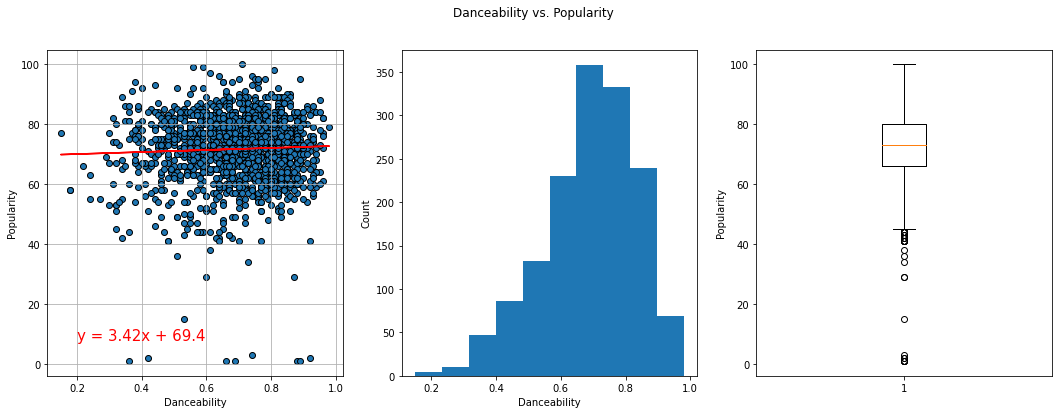


The r-value is: 0.04

---------------------------------------------------------------------

The mean Danceability is 0.69
The median Danceability is 0.71
The mode Danceability is ModeResult(mode=array([0.76]), count=array([52]))

Disribution results for 50 samples for Danceability: NormaltestResult(statistic=2.561860815941647, pvalue=0.27777873263809694)

---------------------------------------------------------------------

The Danceability variance is approx. 0.02
The Danceability standard deviation is approx. 0.14
Roughly 68% of the data is between 0.55 and 0.83
Roughly 95% of the data is between 0.4 and 0.98
Roughly 99.7% of the data is between 0.26 and 1.12

---------------------------------------------------------------------

The lower quartile of Popularity is: 66.0
The upper quartile of Popularity is: 80.0
The interquartile range of Popularity is: 14.0
The the median of Popularity is: 73.0 
Values below 45.0 could be outliers.
Values above 101.0 could be outliers.


<Figure size 720x360 with 0 Axes>

In [231]:
#Popularity vs. Danceability

# Calculate regression values and the line equation
reg_vals, ln_eq, r_val = calcLinregress(danceability,popularity)

# Scatter plot with border around marker
#plt.scatter(popularity_df["Danceability"], popularity_df["Popularity"], edgecolors='k')

# Label
#plt.title(f"Danceability vs. Popularity")
#plt.ylabel("Popularity")
#plt.xlabel("Danceability")
#plt.grid(True)

# Save to image file
#plt.savefig(f"{output_data_loc}/Danceability_vs_Popularity.png")


#fig, axes = plt.subplots(nrows = 2, ncols = 2)
#fig.suptitle = "Danceability vs. Popularity"




genereateDashboard(
    danceability, 
    popularity, 
    "Danceability", 
    "Popularity", 
    reg_vals, 
    ln_eq, 
    0.2,
    8,
    f"{output_data_loc}/Danceability_vs_Popularity.png")

#fig, axs = plt.subplots(1, 3, figsize=(18, 6))
#axs[0].grid(True)
#axs[0].plot(danceability,reg_vals,"r-")    
#axs[0].annotate(ln_eq,(0.2,8),fontsize=15,color="red")
#axs[0].scatter(danceability,popularity, edgecolors='k')
#axs[1].hist(danceability)
#axs[2].boxplot(popularity)
#fig.suptitle('Danceability vs. Popularity')

#axs[0].set_ylabel("Popularity")
#axs[1].set_ylabel("Count")
#axs[2].set_ylabel("Popularity")

#axs[0].set_xlabel("Danceability")
#axs[1].set_xlabel("Danceability")

#plt.show()

generateStatsReport(r_val, danceability, popularity, "Danceability", "Popularity")



#plt.subplot(1,2,1)

#generateScatterPlot(
#                    popularity_df["Danceability"], 
#                    popularity_df["Popularity"],
#                    reg_vals,
#                    0.2,
#                    8,
#                    "Danceability vs. Popularity",
#                    "Danceability",
#                    "Popularity"                    
#                   )


#plt.subplot(1,2,2)

#plt.hist(danceability)
#plt.xlabel('Danceability')
#plt.ylabel('Counts')


# Show plot
#plt.rcParams['figure.figsize'] = (10,5)
#plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)
#plt.show()



 

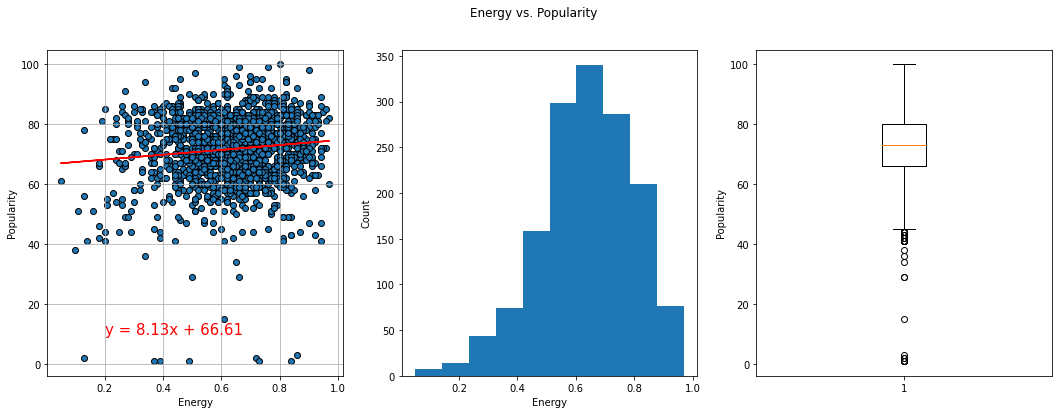


The r-value is: 0.11

---------------------------------------------------------------------

The mean Energy is 0.63
The median Energy is 0.64
The mode Energy is ModeResult(mode=array([0.62]), count=array([50]))

Disribution results for 50 samples for Energy: NormaltestResult(statistic=6.288953764015858, pvalue=0.043089459023374924)

---------------------------------------------------------------------

The Energy variance is approx. 0.03
The Energy standard deviation is approx. 0.16
Roughly 68% of the data is between 0.47 and 0.79
Roughly 95% of the data is between 0.31 and 0.96
Roughly 99.7% of the data is between 0.15 and 1.12

---------------------------------------------------------------------

The lower quartile of Popularity is: 66.0
The upper quartile of Popularity is: 80.0
The interquartile range of Popularity is: 14.0
The the median of Popularity is: 73.0 
Values below 45.0 could be outliers.
Values above 101.0 could be outliers.


<Figure size 720x360 with 0 Axes>

In [232]:
#Popularity vs. Energy


# Calculate regression values and the line equation
reg_vals, ln_eq, r_val = calcLinregress(energy,popularity)

# Scatter plot with border around marker
#plt.scatter(popularity_df["Energy"], popularity_df["Popularity"], edgecolors='k')

# Label
#plt.title(f"Energy vs. Popularity")
#plt.ylabel("Popularity")
#plt.xlabel("Energy")
#plt.grid(True)

# Save to image file
#plt.savefig(f"{output_data_loc}/Energy_vs_Popularity.png")

#generateScatterPlot(
#                    popularity_df["Energy"], 
#                    popularity_df["Popularity"],
#                    reg_vals,
#                    0.2,
#                    10,
#                    "Energy vs. Popularity",
#                    "Energy",
#                    "Popularity"
#                   )




genereateDashboard(
    energy, 
    popularity, 
    "Energy", 
    "Popularity", 
    reg_vals, 
    ln_eq,
    0.2,
    10,
    f"{output_data_loc}/Energy_vs_Popularity.png")


#fig, axs = plt.subplots(1, 3, figsize=(18, 6))
#axs[0].grid(True)
#axs[0].plot(energy,reg_vals,"r-")    
#axs[0].annotate(ln_eq,(0.2,8),fontsize=15,color="red")
#axs[0].scatter(energy,popularity, edgecolors='k')
#axs[1].hist(energy)
#axs[2].boxplot(popularity)
#fig.suptitle('Energy vs. Popularity')

#axs[0].set_ylabel("Popularity")
#axs[1].set_ylabel("Count")
#axs[2].set_ylabel("Popularity")

#axs[0].set_xlabel("Energy")
#axs[1].set_xlabel("Energy")

#plt.show()

generateStatsReport(r_val, energy, popularity, "Energy", "Popularity")


# Show plot
#plt.show()

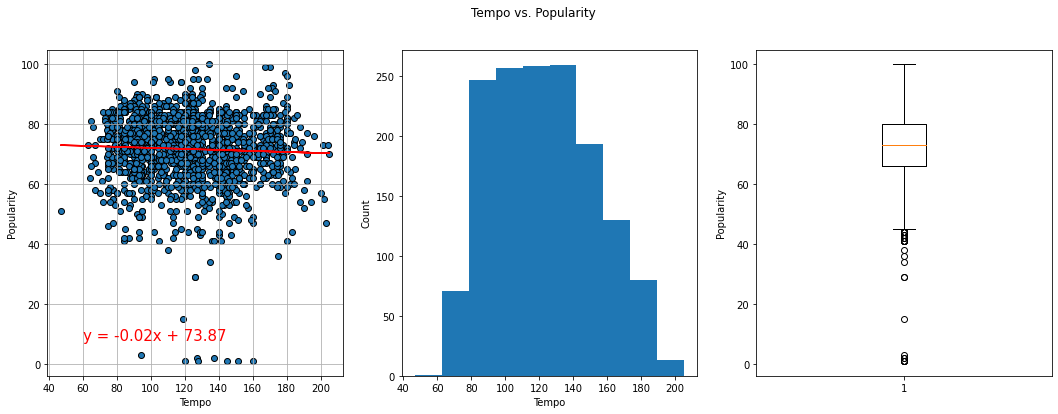


The r-value is: -0.04

---------------------------------------------------------------------

The mean Tempo is 122.86
The median Tempo is 122.0
The mode Tempo is ModeResult(mode=array([140.]), count=array([49]))

Disribution results for 50 samples for Tempo: NormaltestResult(statistic=11.361574619034977, pvalue=0.0034108719740246624)

---------------------------------------------------------------------

The Tempo variance is approx. 878.18
The Tempo standard deviation is approx. 29.63
Roughly 68% of the data is between 93.22 and 152.49
Roughly 95% of the data is between 63.59 and 182.13
Roughly 99.7% of the data is between 33.96 and 211.76

---------------------------------------------------------------------

The lower quartile of Popularity is: 66.0
The upper quartile of Popularity is: 80.0
The interquartile range of Popularity is: 14.0
The the median of Popularity is: 73.0 
Values below 45.0 could be outliers.
Values above 101.0 could be outliers.


<Figure size 720x360 with 0 Axes>

In [233]:
#Popularity vs. Tempo



# Calculate regression values and the line equation
reg_vals, ln_eq, r_val = calcLinregress(tempo,popularity)

# Scatter plot with border around marker
#plt.scatter(popularity_df["Tempo"], popularity_df["Popularity"], edgecolors='k')

# Label
#plt.title(f"Tempo vs. Popularity")
#plt.ylabel("Popularity")
#plt.xlabel("Tempo")
#plt.grid(True)

# Save to image file
#plt.savefig(f"{output_data_loc}/Tempo_vs_Popularity.png")

#generateScatterPlot(
#                    popularity_df["Tempo"], 
#                    popularity_df["Popularity"],
#                    reg_vals,
#                    60,
#                    8,
#                    "Tempo vs. Popularity",
#                    "Tempo",
#                    "Popularity"
#                   )

# Show plot
#plt.show()



#fig, axs = plt.subplots(1, 3, figsize=(18, 6))
#axs[0].grid(True)
#axs[0].plot(tempo,reg_vals,"r-")    
#axs[0].annotate(ln_eq,(60,8),fontsize=15,color="red")
#axs[0].scatter(tempo,popularity, edgecolors='k')
#axs[1].hist(tempo)
#axs[2].boxplot(popularity)
#fig.suptitle('Tempo vs. Popularity')

#axs[0].set_ylabel("Popularity")
#axs[1].set_ylabel("Count")
#axs[2].set_ylabel("Popularity")

#axs[0].set_xlabel("Tempo")
#axs[1].set_xlabel("Tempo")

#plt.show()

genereateDashboard(
    tempo, 
    popularity, 
    "Tempo", 
    "Popularity", 
    reg_vals, 
    ln_eq, 
    60,
    8,
    f"{output_data_loc}/Tempo_vs_Popularity.png")

generateStatsReport(r_val, tempo, popularity, "Tempo", "Popularity")


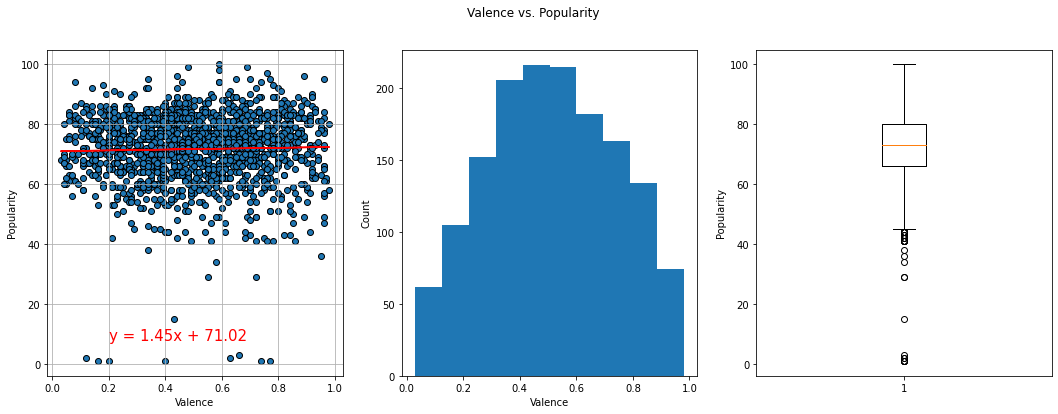


The r-value is: 0.03

---------------------------------------------------------------------

The mean Valence is 0.51
The median Valence is 0.51
The mode Valence is ModeResult(mode=array([0.44]), count=array([28]))

Disribution results for 50 samples for Valence: NormaltestResult(statistic=6.688841377428305, pvalue=0.035280647716030775)

---------------------------------------------------------------------

The Valence variance is approx. 0.05
The Valence standard deviation is approx. 0.23
Roughly 68% of the data is between 0.29 and 0.74
Roughly 95% of the data is between 0.06 and 0.97
Roughly 99.7% of the data is between -0.17 and 1.19

---------------------------------------------------------------------

The lower quartile of Popularity is: 66.0
The upper quartile of Popularity is: 80.0
The interquartile range of Popularity is: 14.0
The the median of Popularity is: 73.0 
Values below 45.0 could be outliers.
Values above 101.0 could be outliers.


<Figure size 720x360 with 0 Axes>

In [234]:
#Popularity vs. Valence


# Calculate regression values and the line equation
reg_vals, ln_eq, r_val = calcLinregress(popularity_df["Valence"],popularity_df["Popularity"])

# Scatter plot with border around marker
#plt.scatter(popularity_df["Valence"], popularity_df["Popularity"], edgecolors='k')

# Label
#plt.title(f"Valence vs. Popularity")
#plt.ylabel("Popularity")
#plt.xlabel("Valence")
#plt.grid(True)

# Save to image file
#plt.savefig(f"{output_data_loc}/Valence_vs_Popularity.png")

#generateScatterPlot(
#                    popularity_df["Valence"], 
#                    popularity_df["Popularity"],
#                    reg_vals,
#                    0.2,
#                    10,
#                    "Valence vs. Popularity",
#                    "Valence",
#                    "Popularity"
#                   )

# Show plot
#plt.show()


#fig, axs = plt.subplots(1, 3, figsize=(18, 6))
#axs[0].grid(True)
#axs[0].plot(valence,reg_vals,"r-")    
#axs[0].annotate(ln_eq,(0.2,8),fontsize=15,color="red")
#axs[0].scatter(valence,popularity, edgecolors='k')
#axs[1].hist(valence)
#axs[2].boxplot(popularity)
#fig.suptitle('Valence vs. Popularity')

#axs[0].set_ylabel("Popularity")
#axs[1].set_ylabel("Count")
#axs[2].set_ylabel("Popularity")

#axs[0].set_xlabel("Valence")
#axs[1].set_xlabel("Valence")

#plt.show()

genereateDashboard(
    valence, 
    popularity, 
    "Valence", 
    "Popularity", 
    reg_vals, 
    ln_eq, 
    0.2,
    8,
    f"{output_data_loc}/Valence_vs_Popularity.png")

generateStatsReport(r_val, valence, popularity, "Valence", "Popularity")

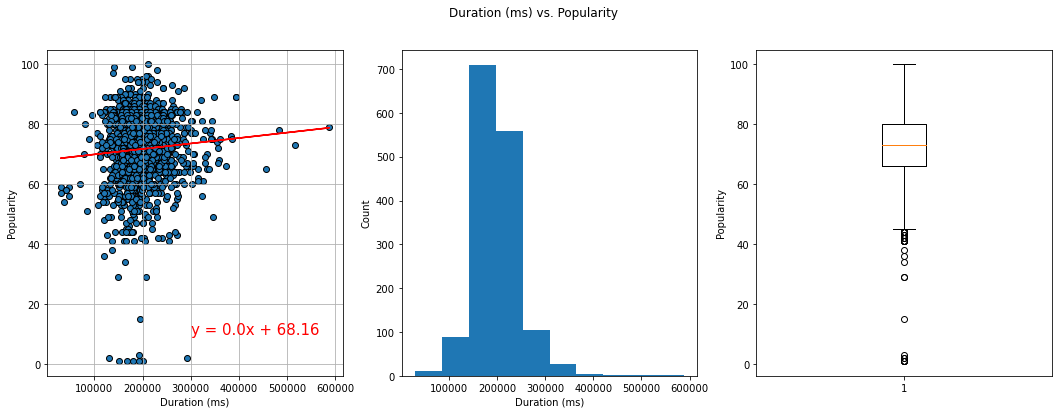


The r-value is: 0.07

---------------------------------------------------------------------

The mean Duration (ms) is 198247.42
The median Duration (ms) is 193795.0
The mode Duration (ms) is ModeResult(mode=array([162803]), count=array([3]))

Disribution results for 50 samples for Duration (ms): NormaltestResult(statistic=66.96695063297086, pvalue=2.872839973840831e-15)

---------------------------------------------------------------------

The Duration (ms) variance is approx. 2236739976.76
The Duration (ms) standard deviation is approx. 47294.19
Roughly 68% of the data is between 150953.23 and 245541.6
Roughly 95% of the data is between 103659.05 and 292835.79
Roughly 99.7% of the data is between 56364.86 and 340129.98

---------------------------------------------------------------------

The lower quartile of Popularity is: 66.0
The upper quartile of Popularity is: 80.0
The interquartile range of Popularity is: 14.0
The the median of Popularity is: 73.0 
Values below 45.0 could b

<Figure size 720x360 with 0 Axes>

In [235]:
#Popularity vs. Duration (ms)


# Calculate regression values and the line equation
reg_vals, ln_eq, r_val = calcLinregress(duration, popularity)

# Scatter plot with border around marker
#plt.scatter(popularity_df["Duration (ms)"], popularity_df["Popularity"], edgecolors='k')

# Label
#plt.title(f"Duration (ms) vs. Popularity")
#plt.ylabel("Popularity")
#plt.xlabel("Duration (ms)")
#plt.grid(True)

# Save to image file
#plt.savefig(f"{output_data_loc}/Duration_vs_Popularity.png")

#generateScatterPlot(
#                    popularity_df["Duration (ms)"], 
#                    popularity_df["Popularity"],
#                    reg_vals,                    
#                    300000,
#                    10,
#                    "Duration (ms) vs. Popularity",
#                    "Duration (ms)",
#                    "Popularity"
#                   )

# Show plot
#plt.show()



#fig, axs = plt.subplots(1, 3, figsize=(18, 6))
#axs[0].grid(True)
#axs[0].plot(duration,reg_vals,"r-")    
#axs[0].annotate(ln_eq,(300000,10),fontsize=15,color="red")
#axs[0].scatter(duration,popularity, edgecolors='k')
#axs[1].hist(duration)
#axs[2].boxplot(popularity)
#fig.suptitle('Duration (ms) vs. Popularity')

#axs[0].set_ylabel("Popularity")
#axs[1].set_ylabel("Count")
#axs[2].set_ylabel("Popularity")

#axs[0].set_xlabel("Duration (ms)")
#axs[1].set_xlabel("Duration (ms)")

#plt.show()

genereateDashboard(
    duration, 
    popularity, 
    "Duration (ms)", 
    "Popularity", 
    reg_vals, 
    ln_eq, 
    300000,
    10,
    f"{output_data_loc}/Duration_vs_Popularity.png")

generateStatsReport(r_val, duration, popularity, "Duration (ms)", "Popularity")

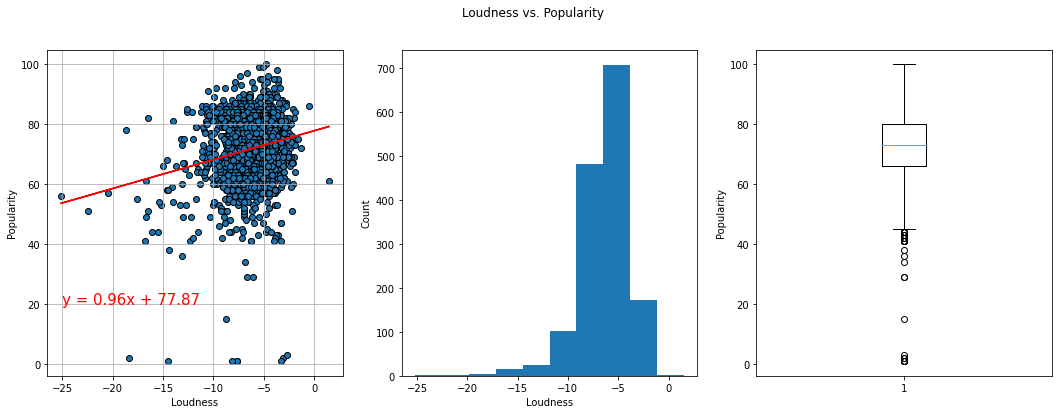


The r-value is: 0.21

---------------------------------------------------------------------

The mean Loudness is -6.34
The median Loudness is -6.0
The mode Loudness is ModeResult(mode=array([-5.22]), count=array([9]))

Disribution results for 50 samples for Loudness: NormaltestResult(statistic=21.54507663443065, pvalue=2.096747108316451e-05)

---------------------------------------------------------------------

The Loudness variance is approx. 6.25
The Loudness standard deviation is approx. 2.5
Roughly 68% of the data is between -8.84 and -3.84
Roughly 95% of the data is between -11.34 and -1.34
Roughly 99.7% of the data is between -13.84 and 1.15

---------------------------------------------------------------------

The lower quartile of Popularity is: 66.0
The upper quartile of Popularity is: 80.0
The interquartile range of Popularity is: 14.0
The the median of Popularity is: 73.0 
Values below 45.0 could be outliers.
Values above 101.0 could be outliers.


<Figure size 720x360 with 0 Axes>

In [236]:
#Popularity vs. Loudness


# Calculate regression values and the line equation
reg_vals, ln_eq, r_val = calcLinregress(popularity_df["Loudness"],popularity_df["Popularity"])

# Scatter plot with border around marker
#plt.scatter(popularity_df["Loudness"], popularity_df["Popularity"], edgecolors='k')

# Label
#plt.title(f"Loudness vs. Popularity")
#plt.ylabel("Popularity")
#plt.xlabel("Loudness")
#plt.grid(True)

# Save to image file
#plt.savefig(f"{output_data_loc}/Loudness_vs_Popularity.png")

#generateScatterPlot(
#                    popularity_df["Loudness"], 
#                    popularity_df["Popularity"],
#                    reg_vals,
#                    -25,
#                    20,
#                    "Loudness vs. Popularity",
#                    "Loudness",
#                    "Popularity"
#                   )

# Show plot
#plt.show()



#fig, axs = plt.subplots(1, 3, figsize=(18, 6))
#axs[0].grid(True)
#axs[0].plot(loudness,reg_vals,"r-")    
#axs[0].annotate(ln_eq,(-25,20),fontsize=15,color="red")
#axs[0].scatter(loudness,popularity, edgecolors='k')
#axs[1].hist(loudness)
#axs[2].boxplot(popularity)
#fig.suptitle('Loudness vs. Popularity')

#axs[0].set_ylabel("Popularity")
#axs[1].set_ylabel("Count")
#axs[2].set_ylabel("Popularity")

#axs[0].set_xlabel("Loudness")
#axs[1].set_xlabel("Loudness")

#plt.show()

genereateDashboard(
    loudness, 
    popularity, 
    "Loudness", 
    "Popularity", 
    reg_vals, 
    ln_eq, 
    -25,
    20,
    f"{output_data_loc}/Loudness_vs_Popularity.png")

generateStatsReport(r_val, loudness, popularity, "Loudness", "Popularity")